## Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
main_df = pd.read_csv("train.csv")
final_df = pd.read_csv("test.csv")

In [3]:
main_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
final_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
main_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

In [7]:
age_bins = np.arange(0,90,20)
age_bins

array([ 0, 20, 40, 60, 80])

In [8]:
main_df[main_df['Survived']==1].count()[0]

342

In [9]:
df_age = pd.DataFrame()
df_age['Survived'] = main_df['Survived']
df_age['Age'] = main_df['Age']
df_age['Sex'] = main_df['Sex']
df_age['AgeGroup'] = pd.cut(main_df['Age'], bins=age_bins)

df_male = df_age[df_age['Sex']=='male']
df_male =df_male.rename(columns={"AgeGroup": "Male Age"})

df_female = df_age[df_age['Sex']=='female']
df_female = df_female.rename(columns={"AgeGroup": "Female Age"})

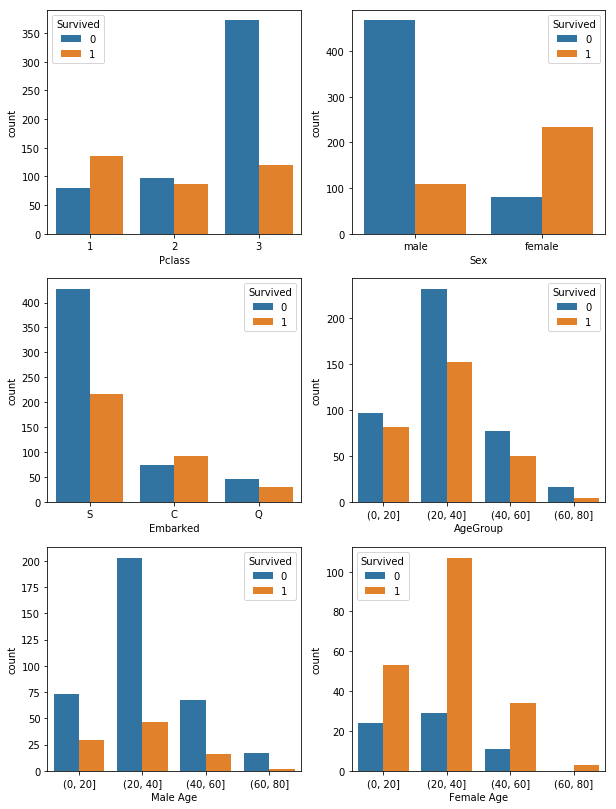

In [10]:
fig=plt.figure(figsize=[10,14])

fig.add_subplot(3,2,1)
sns.countplot(x='Pclass',hue='Survived',data=main_df)

fig.add_subplot(3,2,2)
sns.countplot(x='Sex',hue='Survived',data=main_df)

fig.add_subplot(3,2,3)
sns.countplot(x='Embarked',hue='Survived',data=main_df)

fig.add_subplot(3,2,4)
sns.countplot(x='AgeGroup',hue='Survived',data=df_age)

fig.add_subplot(3,2,5)
sns.countplot(x='Male Age',hue='Survived',data=df_male)

fig.add_subplot(3,2,6)
sns.countplot(x='Female Age',hue='Survived',data=df_female)

plt.show()

In [11]:
int(main_df[main_df['Survived']==1].count()[0])

342

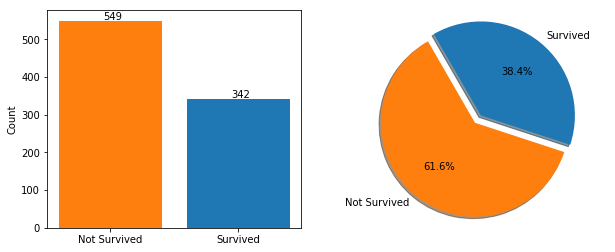

In [12]:
labels = ['Not Survived','Survived']
explode = (0, 0.1)
survivors_data = [main_df[main_df['Survived']==0].count()[0],main_df[main_df['Survived']==1].count()[0]]

fig = plt.figure(figsize=[10,4])

ax1 = fig.add_subplot(1,2,1)
barplot = plt.bar(labels,
                  survivors_data,
                  align='center')
barplot[0].set_color('C1')
barplot[1].set_color('C0')
plt.ylabel('Count')

for i, v in enumerate(survivors_data): #display numbers above bars
    ax1.text(i-0.05, v+2, str(v))

ax2 = fig.add_subplot(1,2,2)
ax2.pie(survivors_data,
        labels=labels,
        explode = explode,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=120,
        colors=['C1','C0'])
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Dealing with Missing and Categorical values

In [13]:
both_df = pd.concat([main_df, final_df])
both_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [14]:
names = {}
counter = 1

for item in both_df['Name']:
    if item.split(",")[1].split(".")[0].strip(" ") not in names:
        names[item.split(",")[1].split(".")[0].strip(" ")] = counter
        counter += 1
        
names   

{'Capt': 15,
 'Col': 14,
 'Don': 5,
 'Dona': 18,
 'Dr': 7,
 'Jonkheer': 17,
 'Lady': 11,
 'Major': 10,
 'Master': 4,
 'Miss': 3,
 'Mlle': 13,
 'Mme': 8,
 'Mr': 1,
 'Mrs': 2,
 'Ms': 9,
 'Rev': 6,
 'Sir': 12,
 'the Countess': 16}

In [15]:
age_mean = both_df["Age"].mean() # Get age from both datasets
age_mean

29.881137667304014

In [16]:
age_by_name = {}
counter = 0
age = 0

for name in names:
    for n,item in enumerate(both_df['Name']):
        if item.split(",")[1].split(".")[0].strip(" ") == name:
            if pd.notna(both_df.iloc[n]['Age']):
                counter += 1
                age += both_df.iloc[n]['Age']
    age_by_name[name] = age/counter # Get the average
    counter = 0
    age = 0
    
age_by_name

{'Capt': 70.0,
 'Col': 54.0,
 'Don': 40.0,
 'Dona': 39.0,
 'Dr': 43.57142857142857,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 5.482641509433963,
 'Miss': 21.774238095238097,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.25215146299484,
 'Mrs': 36.99411764705882,
 'Ms': 28.0,
 'Rev': 41.25,
 'Sir': 49.0,
 'the Countess': 33.0}

In [17]:
both_df['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [18]:
list(set(both_df['Cabin']))[:10]

[nan, 'E17', 'C65', 'D35', 'E24', 'E25', 'E31', 'C78', 'F E46', 'D40']

In [19]:
deck_dict = {}
counter = 1

for item in set(both_df['Cabin']):
    if not(pd.isna(item)) and item[0] not in deck_dict:
        deck_dict[item[0]]=counter
        counter += 1

deck_dict

{'A': 5, 'B': 6, 'C': 2, 'D': 3, 'E': 1, 'F': 4, 'G': 8, 'T': 7}

In [20]:
cabin_average = {}
counter = 0
fare = 0

for deck in deck_dict:
    for n,item in enumerate(both_df['Cabin']):
        if pd.notna(item) and item[0] == deck:
            counter += 1
            fare += both_df.iloc[n]['Fare']    
    cabin_average[fare/counter] = deck
    counter = 0
    fare = 0
            
cabin_average

{14.205000000000002: 'G',
 18.079366666666665: 'F',
 35.5: 'T',
 41.24431363636364: 'A',
 53.00733913043479: 'D',
 54.564634146341454: 'E',
 107.92659787234044: 'C',
 122.38307846153847: 'B'}

In [21]:
# Get the nearest value from a list (using '18' only for testing)
# For every item on that list, lambda function will use 'abs(item-18)' instead of 'item', the choose the lower 'item'
cabin_average[min(list(cabin_average.keys()), key=lambda x:abs(x-18))] 

'F'

In [22]:
def preprocess(df):
    
    df["Family"] = df["Parch"] + df["SibSp"]
    
    for n,item in enumerate(df["Cabin"]):
        if pd.isna(item):
            cabin_key = cabin_average[min(list(cabin_average.keys()), key=lambda x:abs(x-df["Fare"][n]))]
            df.at[n,"Cabin"] = deck_dict[cabin_key]
        else:
            df.at[n,"Cabin"] = deck_dict[item[0]]

    for n,item in enumerate(df["Age"]):
        if pd.isna(item):
            df.at[n,"Age"] = age_by_name[df.iloc[n]["Name"].split(",")[1].split(".")[0].strip(" ")]
    
    for n,item in enumerate(df["Name"]):
        if item.split(",")[1].split(".")[0].strip(" ") in names:
            df.at[n,"Name"] = names[item.split(",")[1].split(".")[0].strip(" ")]
        else:
            df.at[n,"Name"] = 0
    
    for n,item in enumerate(df["Sex"]):
        if item == "male":
            df.at[n,"Sex"] = 0 #According documentation, use dt.at[row, 'collumn'] instead df['column'][row]
        elif item == "female":
            df.at[n,"Sex"] = 1
        else:
            df.at[n,"Sex"] = 2 #Just in case
            
    for n,item in enumerate(df["Embarked"]):
        if item == "S":
            df.at[n,"Embarked"] = 0 #According documentation, use dt.at[row, 'collumn'] instead df['column'][row]
        elif item == "C":
            df.at[n,"Embarked"] = 1
        elif item == "Q":
            df.at[n,"Embarked"] = 2 
        else:
            df.at[n,"Embarked"] = 3 #Just in case
    
    df = df.drop(["PassengerId","Ticket","Parch","SibSp"], axis=1)            
    df = df.fillna(0)
            
    return df

In [23]:
main_df = preprocess(main_df)
main_df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,1,0,22.0,7.2500,8,0,1
1,1,1,2,1,38.0,71.2833,2,1,1
2,1,3,3,1,26.0,7.9250,8,0,0
3,1,1,2,1,35.0,53.1000,2,0,1
4,0,3,1,0,35.0,8.0500,8,0,0


## Separating X_train and y_train

In [24]:
X = main_df.drop(['Survived'], axis=1)
y = main_df['Survived']

X.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,3,1,0,22.0,7.2500,8,0,1
1,1,2,1,38.0,71.2833,2,1,1
2,3,3,1,26.0,7.9250,8,0,0
3,1,2,1,35.0,53.1000,2,0,1
4,3,1,0,35.0,8.0500,8,0,0


In [25]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Balancing Data (Over-sampling)

In [26]:
len(X)

891

In [27]:
y.mean()

0.3838383838383838

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X, y)

In [29]:
y_train.mean()

0.5

In [30]:
len(X_train)

1098

## Scaling Data

In [31]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train[:5]

array([[1.        , 0.        , 0.        , 0.27117366, 0.01415106,
        1.        , 0.        , 0.1       ],
       [0.        , 0.0625    , 1.        , 0.4722292 , 0.13913574,
        0.14285714, 0.33333333, 0.1       ],
       [1.        , 0.125     , 1.        , 0.32143755, 0.01546857,
        1.        , 0.        , 0.        ],
       [0.        , 0.0625    , 1.        , 0.43453129, 0.1036443 ,
        0.14285714, 0.        , 0.1       ],
       [1.        , 0.        , 0.        , 0.43453129, 0.01571255,
        1.        , 0.        , 0.        ]])

## Building Random Forest

In [32]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=101)
rf.fit(scaled_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

In [33]:
# Some Metrics
print("RF Score:", rf.score(scaled_X_train, y_train))
print("oob score:", rf.oob_score_)
print("CV score:", cross_val_score(rf, scaled_X_train, y_train, cv = 3, scoring='precision').mean())

RF Score: 0.9899817850637522
oob score: 0.8570127504553734
CV score: 0.8414187998237391


## Hyperparameters tuning

In [34]:
print(rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': True, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [35]:
rf_grid = RandomForestClassifier(oob_score=True, random_state=101) # creates a new estimator

# Create the parameter grid based on the results of random search 
param_grid = {"criterion" : ["gini", "entropy"],
              'min_samples_leaf': [1, 2, 3, 4],
              'min_samples_split': [2, 3, 10],
              'n_estimators': [50, 100, 200, 300]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='precision')

In [36]:
# Fit the grid search to the data and show the best parameters
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   20.9s finished


{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [37]:
best_grid = grid_search.best_estimator_
best_grid # Note that it's a classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

In [38]:
print("RF Score:", best_grid.score(scaled_X_train, y_train))
print("oob score:", best_grid.oob_score_)
print("CV score:", cross_val_score(best_grid, scaled_X_train, y_train, cv = 3, scoring='precision').mean())

RF Score: 0.9316939890710383
oob score: 0.8579234972677595
CV score: 0.8797120652466566


## Checking importances

In [39]:
best_grid.feature_importances_

array([0.08216069, 0.24484803, 0.21140973, 0.13548834, 0.15459207,
       0.0567899 , 0.03560587, 0.07910538])

In [40]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(best_grid.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Name,0.245
Sex,0.211
Fare,0.155
Age,0.135
Pclass,0.082
Family,0.079
Cabin,0.057
Embarked,0.036


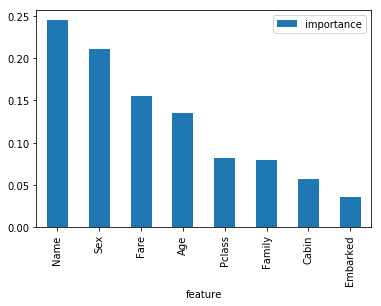

In [41]:
importances.plot.bar()
plt.show()

## Final Prediction

In [42]:
submission_df = preprocess(final_df)

In [43]:
scaled_X_final = scaler.transform(submission_df)
scaled_X_final

array([[1.        , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.        ],
       [1.        , 0.0625    , 1.        , ..., 1.        , 0.        ,
        0.1       ],
       [0.5       , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.1875    , 0.        , ..., 0.42857143, 0.33333333,
        0.2       ]])

In [44]:
final_prediction = best_grid.predict(scaled_X_final)
final_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [45]:
final = pd.concat([final_df['PassengerId'],pd.DataFrame(final_prediction, columns=['Survived'])], axis=1)
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Writing on CSV file

In [46]:
with open('submission.csv','w') as csv_file:
    csv_file.write('PassengerId,Survived\n')
    
    for index,row in final.iterrows():
        text = str(row['PassengerId'])+','+str(row['Survived'])
        csv_file.write(text+'\n')